## Importing the Libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Importing the data.

### About the data: This is a Sample dataset which is part of Machine Learning with R by Brett Lantz book. This dataset is downloaded from Kaggle. This dataset is about the medical cost of patients from various regions of United States of America.
### Link of the dataset: https://www.kaggle.com/datasets/mirichoi0218/insurance

In [2]:
df = pd.read_csv(r"C:\Users\DELL\Downloads\archive (7)\insurance.csv", encoding='unicode_escape')

## Understanding and Cleaning the dataset.

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### counting males and Females in daraset.

In [8]:
# Count of Male and Female.
df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

### Counting Number of Smokers and Non smokers in dataset.

In [9]:
# Count of number of smokers and non smokers.
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

### Counting number of people belonging to different regions.

In [10]:
# Count of people belonging to different regions.
df.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

### Replacing the categorical variables with numerical values.

### *sex : 1 - male, 0 - female
### *smoker : 1 - yes, 0 - no
### *region : southwest :0, southeast :1, northwest :2, northeast: 3

In [11]:
df['sex'] = df['sex'].map({'male': 1, 'female':0})
df['smoker'] = df['smoker'].map({'yes': 1, 'no':0})
df['region'] = df['region'].map({'southwest':0,'southeast':1,'northwest':2,'northeast':3})

In [12]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520
5,31,0,25.740,0,0,1,3756.62160
6,46,0,33.440,1,0,1,8240.58960
7,37,0,27.740,3,0,2,7281.50560
8,37,1,29.830,2,0,3,6406.41070
9,60,0,25.840,0,0,2,28923.13692


## Exploratory Data Analysis(EDA)

### Age Distribution Graph

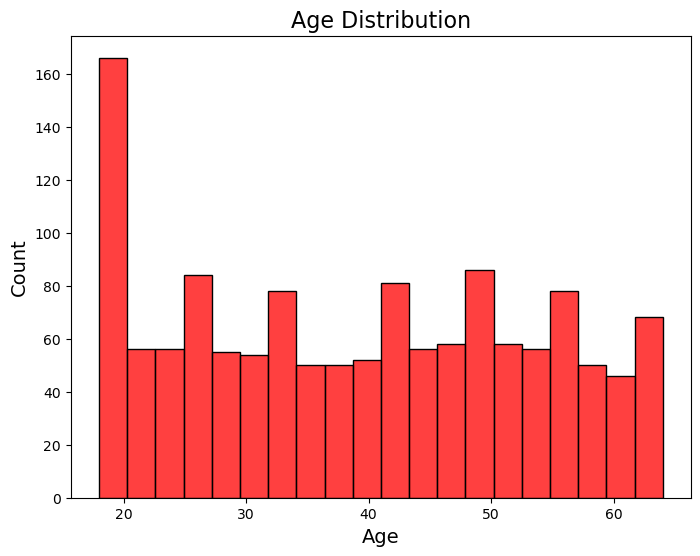

In [13]:
# Histogram of Age distribution

plt.figure(figsize=(8,6))
sns.histplot(df.age, bins=20, kde=False, color='red')
plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

### From the graph it is clear that most number of patients are young (below age of 20) or old (more than age of 20).

### Gender Distribution Graph

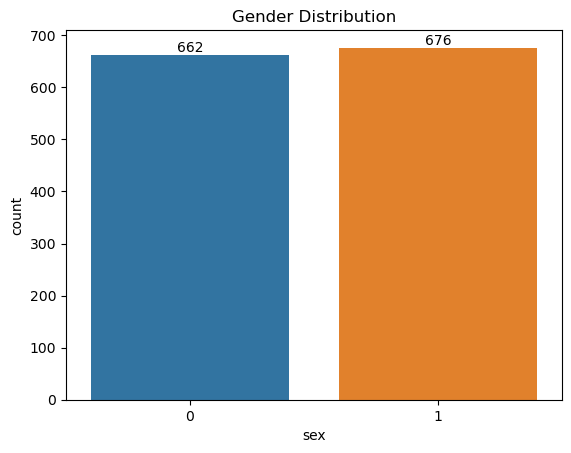

In [15]:
ax = sns.countplot(x = 'sex', data = df)
plt.title('Gender Distribution')

for bars in ax.containers:
    ax.bar_label(bars)

### There is not much diffenece between number of Males and Females in the group. There are only 14 more males than the number of females.

### BMI Distribution

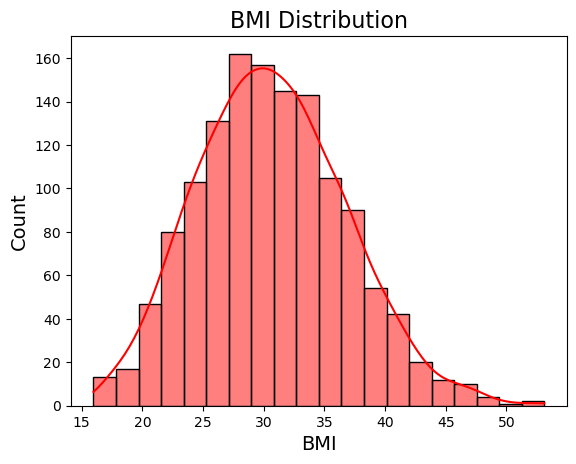

In [16]:
#bmi distribution
sns.histplot(df.bmi,bins=20, kde=True,color='red')
plt.title('BMI Distribution', fontsize=16)
plt.xlabel('BMI',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.show()

### From the above graph it can be concluded that most patients has BMI between 25 to 40.

### Child Distribution Plot

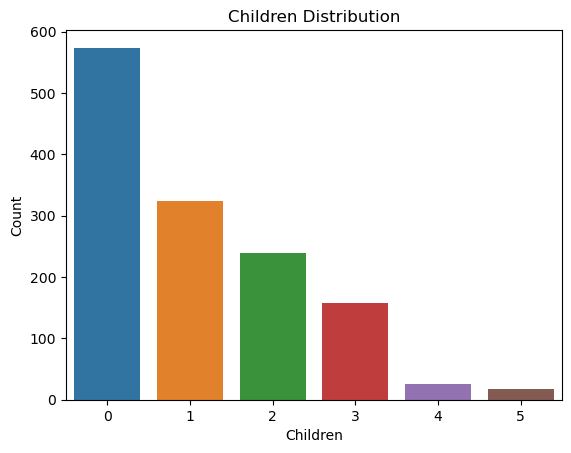

In [17]:
#child count distribution
sns.countplot(x = 'children', data = df)
plt.title('Children Distribution')
plt.xlabel('Children')
plt.ylabel('Count')
plt.show()

### Here graph clearly shows that most of the patients have no children and ver few have more than 3 children.

### Region wise distributon of Patients

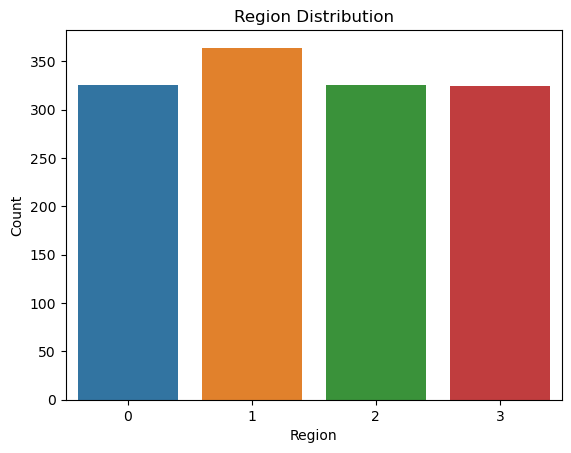

In [35]:
#regionwise plot
bx = sns.countplot(x = 'region', data = df)
plt.title('Region Distribution')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

### There are most patients from Southeast region. All the other regions have almost equal number of patients.

### Bar Graph for number of smokers

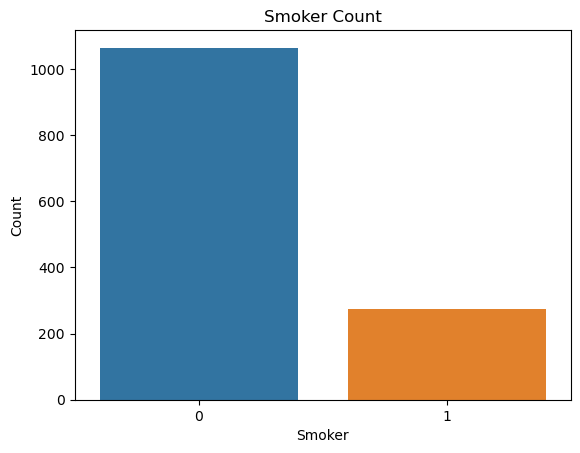

In [36]:
#count of smokers
sns.countplot(x = 'smoker', data = df)
plt.title('Smoker Count')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()

### smokers are very few in the dataset. Nearly 80% of the patients are non-smokers.

### Smoker count with respect to the children count.

<Axes: xlabel='smoker', ylabel='count'>

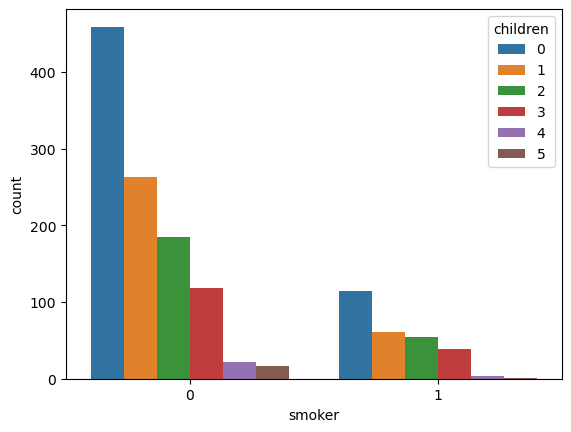

In [20]:
sns.countplot(x = df.smoker, hue = df.children)


### Charges Distribution Plot

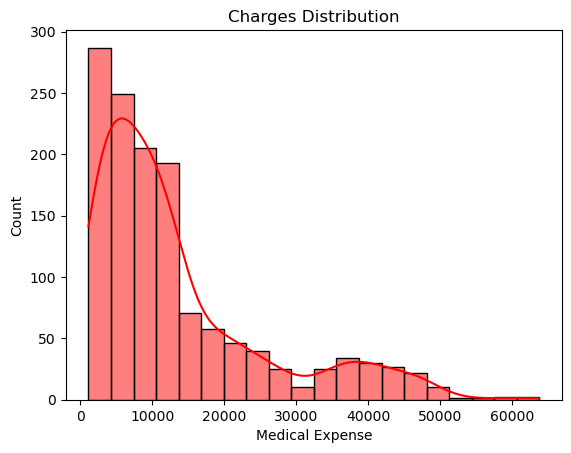

In [26]:
#charges distribution
sns.histplot(df.charges,bins=20, kde=True,color='red')
plt.title('Charges Distribution')
plt.xlabel('Medical Expense')
plt.ylabel('Count')
plt.show()

### Most of the Patients have medical expenses below 20000, with negligible number of patients having medical expenses above 50000.

### Co-relation Heatmap

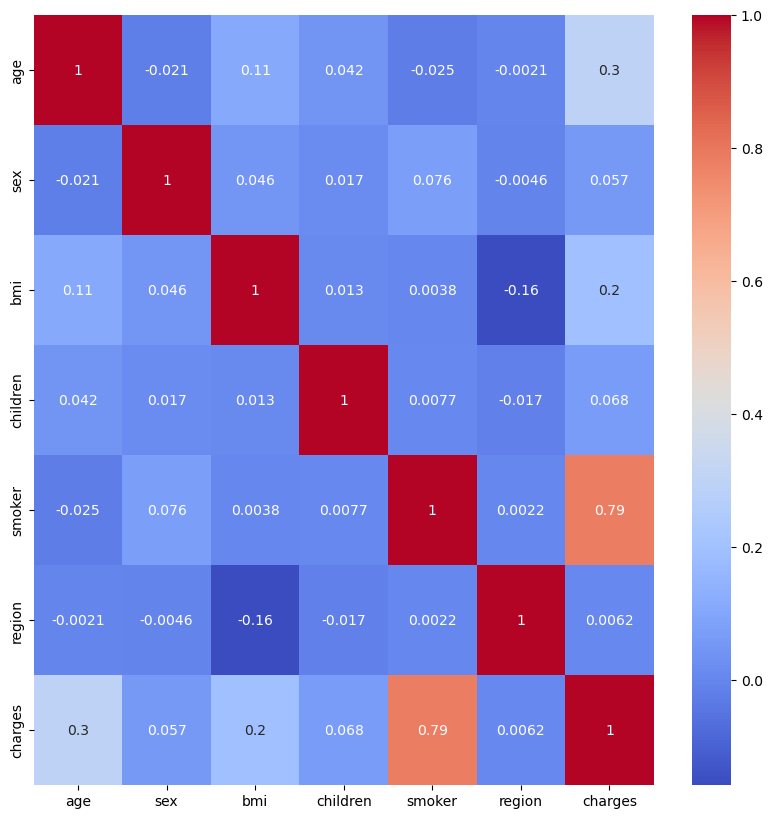

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

### From the heatmap we can conclude that smoker variable has highest relation with charges.

### Smoker Count with Gender of Patients.

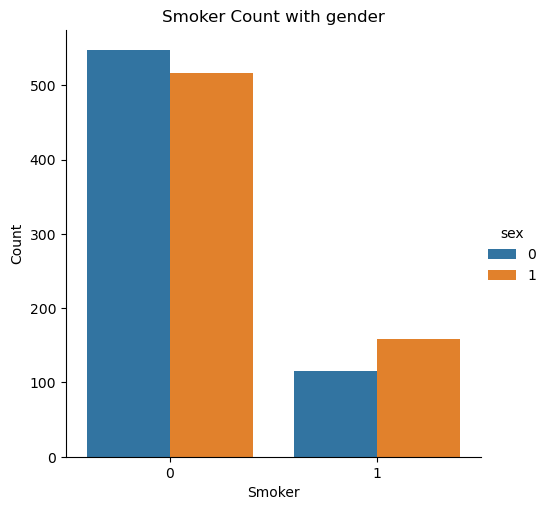

In [23]:
sns.catplot(x="smoker", kind="count",hue = 'sex', data=df)
plt.title('Smoker Count with gender')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()

### We can notice more male smokers than female smokers. So, we can assume that medical treatment expense for males would be more than females, given the impact of smoking on the medical expenses.

### Violin Plot for charges and sex.

<Axes: xlabel='sex', ylabel='charges'>

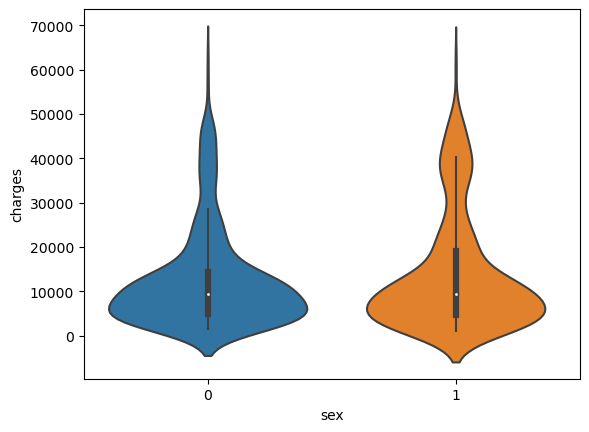

In [24]:
sns.violinplot(x = 'sex', y = 'charges', data = df)

### Medical Expenses for Women

<Axes: title={'center': 'Box plot for charges of women'}, xlabel='charges', ylabel='smoker'>

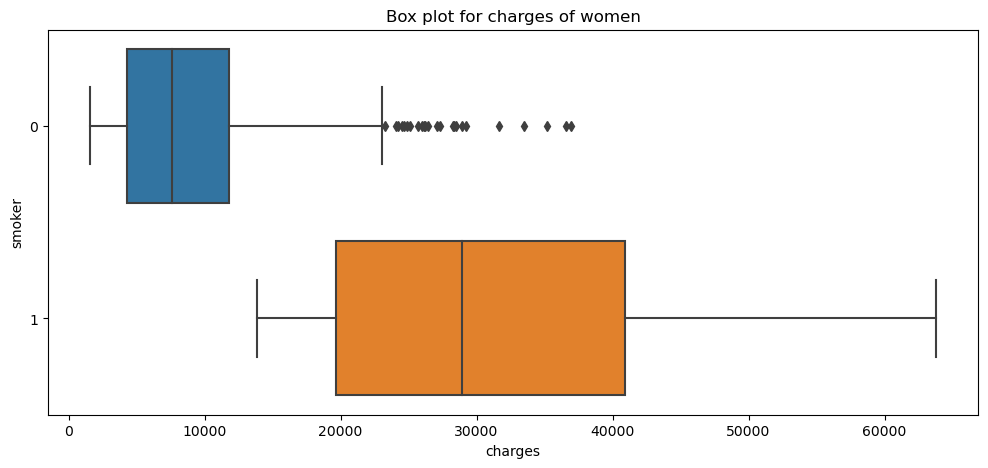

In [27]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of women")
sns.boxplot(y="smoker", x="charges", data =  df[(df.sex == 0)] , orient="h")

### Medical Expenses of Men

<Axes: title={'center': 'Box plot for charges of men'}, xlabel='charges', ylabel='smoker'>

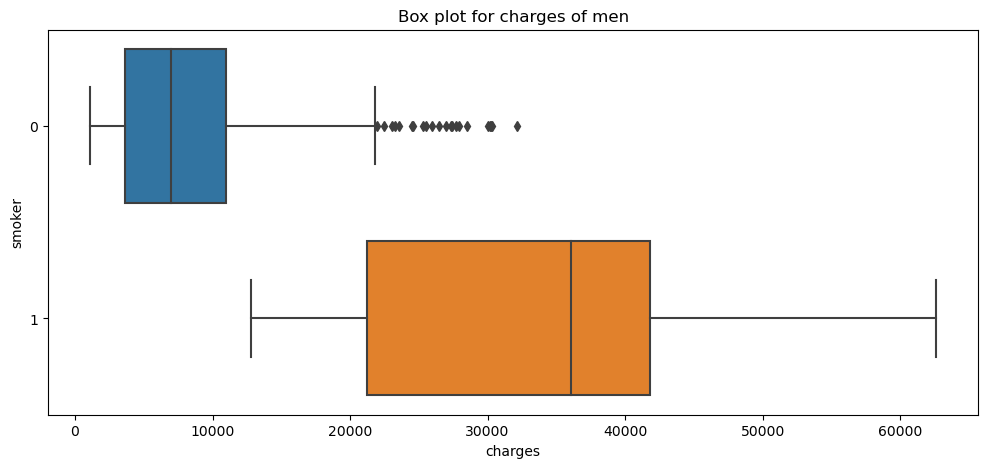

In [28]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of men")
sns.boxplot(y="smoker", x="charges", data =  df[(df.sex == 1)] , orient="h")

### The assumption which we made earlier is True as the medical expense of males is greater than that of females. In addituion to that medical expense of smokers is greater than that of non-smokers.

### Medical Expense of Smokers and Non-smokers

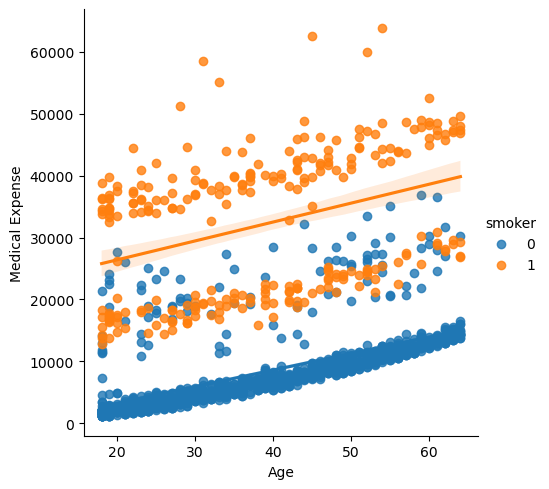

In [29]:
sns.lmplot(x="age", y="charges", data =  df, hue = 'smoker')
plt.xlabel('Age')
plt.ylabel('Medical Expense')
plt.show()

### In non-smokers, the cost of treatment increases with age which is obvious.
### In smokers, the cost of treatment is high even for younger patients, which means the smoking patients are spending upon their smoking related illness as well as age related illness.

### Charges distribution for patients with BMI greater than 30 i.e. obese patients


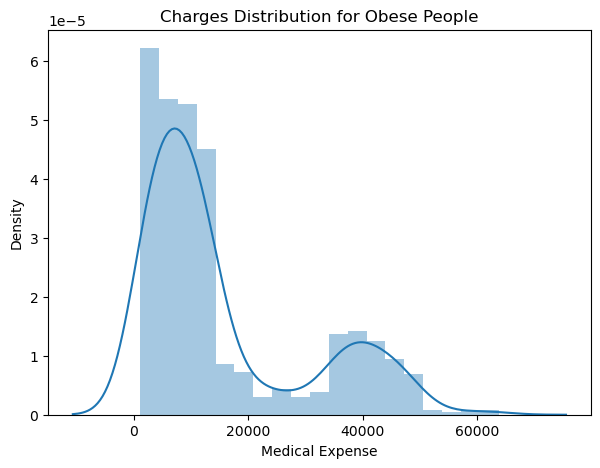

In [30]:
plt.figure(figsize=(7,5))
sns.distplot(df[(df.bmi >= 30)]['charges'])
plt.title('Charges Distribution for Obese People')
plt.xlabel('Medical Expense')
plt.show()

### Charges distribution for patients with BMI less than 30 i.e. healthy patients


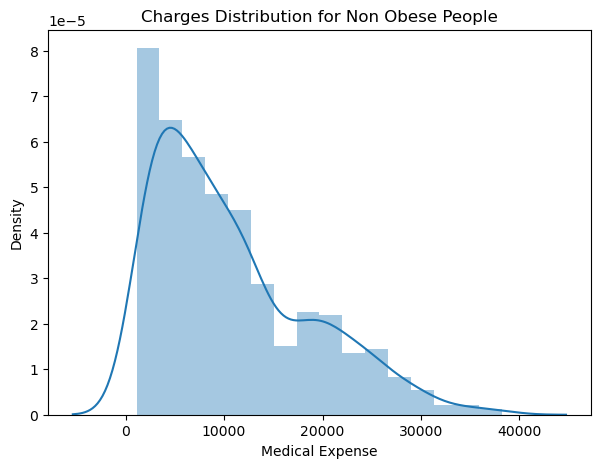

In [31]:
plt.figure(figsize=(7,5))
sns.distplot(df[(df.bmi < 30)]['charges'])
plt.title('Charges Distribution for Non Obese People')
plt.xlabel('Medical Expense')
plt.show()

### Patients with BMI less than 30 are spending less on medical treatment than those with BMI greater than 30.

## Conclusion and Inference:
### 1. Most number of patients are young (below age of 20) or old (more than age of 20).
### 2. There is not much diffenece between number of Males and Females in the group. There are only 14 more males than the number of females.
### 3. Most patients has BMI between 25 to 40, which is obvious as 25-40 BMI is for Obese people and we know that Obese People are more prone to get ill.
### 4. Most of the Patients have medical expenses below 20000, with negligible number of patients having medical expenses above 50000.
### 5. From the Box plot graph we clearly saw that medical expense of smokers is greater than that of non-smokers and because of which Males have higher expense as they smoke more than Females.
### 6. In non-smokers, the cost of treatment increases with age which is obvious.
### 7. In smokers, the cost of treatment is high even for younger patients, which means the smoking patients are spending upon their smoking related illness as well as age related illness.
### 8. Patients with BMI less than 30 are spending less on medical treatment than those with BMI greater than 30.